# Shopping cart problem

## Downloading and Preparing Data

In [105]:
# Importing the libraries
import numpy as np                        # useful for many scientific computing in Python
import matplotlib.pyplot as plt
import pandas as pd                       # primary data structure library
from IPython.display import display
import seaborn as sns

In [70]:
# Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv')
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
print ('data dimensions:', dataset.shape)

data dimensions: (7500, 20)


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
shrimp               7500 non-null object
almonds              5746 non-null object
avocado              4388 non-null object
vegetables mix       3344 non-null object
green grapes         2528 non-null object
whole weat flour     1863 non-null object
yams                 1368 non-null object
cottage cheese       980 non-null object
energy drink         653 non-null object
tomato juice         394 non-null object
low fat yogurt       255 non-null object
green tea            153 non-null object
honey                86 non-null object
salad                46 non-null object
mineral water        24 non-null object
salmon               7 non-null object
antioxydant juice    3 non-null object
frozen smoothie      3 non-null object
spinach              2 non-null object
olive oil            0 non-null float64
dtypes: float64(1), object(19)
memory usage: 1.1+ MB


In [72]:
# Statistical Summary
dataset.describe(include = 'all')

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
count,7500,5746,4388,3344,2528,1863,1368,980,653,394,255,153,86,46,24,7,3,3,2,0.0
unique,115,117,115,114,110,106,102,98,88,80,66,50,42,28,18,7,2,2,2,NaN
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,sparkling water,frozen smoothie,protein bar,cereals,NaN
freq,577,484,375,201,153,107,96,67,57,31,21,14,8,4,3,1,2,2,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
dataset.columns         # Columns Name

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [74]:
df['shrimp'].value_counts()   # Those who buy shrimp as buy these things

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
oatmeal                1
body spray             1
cream                  1
cauliflower            1
shampoo                1
Name: shrimp, Length: 115, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

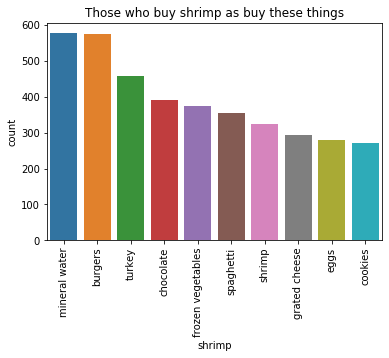

In [108]:
sns.countplot(x = 'shrimp', data = dataset, order = dataset['shrimp'].value_counts().iloc[:10].index)
plt.title('Those who buy shrimp as buy these things')
plt.xticks(rotation=90)        

### Most of the people buy mineral water and burgers along with Shrimp

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

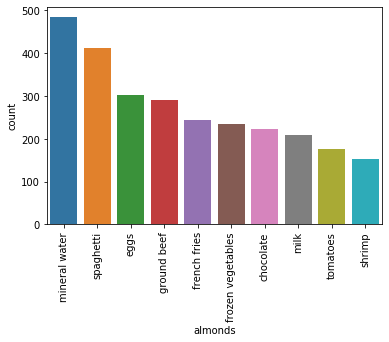

In [76]:
sns.countplot(x = 'almonds', data = dataset, order = dataset['almonds'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

## Most of the people buy mineral water and spaghetti along with Almonds

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

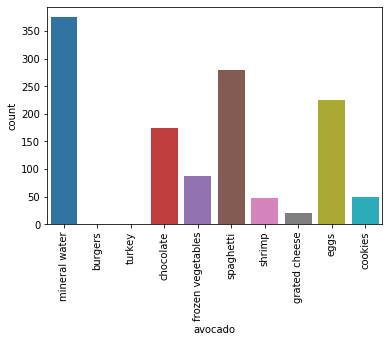

In [77]:
sns.countplot(x = 'avocado', data = dataset, order = dataset['shrimp'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [109]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header = None)  # Exclude header
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
transactions = []                          # Getting all the dataset in a single empty set.
for i in range(0, 7501):
    transactions.append([str(df.values[i,j]) for j in range(0, 20)])

## Training Apriori on the dataset

In [85]:
!pip install apyori               # Installing the apyori libraries
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

# Visualising the results
results = list(rules)

In [86]:
display(results)

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

## Results

#### 1. People who buy light cream also buy chicken. Here support = 0.00453, Confidence = 0.2905, lift = 4.843

#### 2.  People who buy mushroom cream sauce also buy escalope. Here support = 0.005732, Confidence = 0.30065, lift = 3.7908 and so on

# Word Clouds

### Most Frequent Words

In [100]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [114]:
# open the file and read it into a variable alice_novel
freq_word = open('Market_Basket_Optimisation.csv', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [115]:
stopwords = set(STOPWORDS)

In [116]:
# instantiate a word cloud object
freq_wd = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
freq_wd.generate(freq_word)

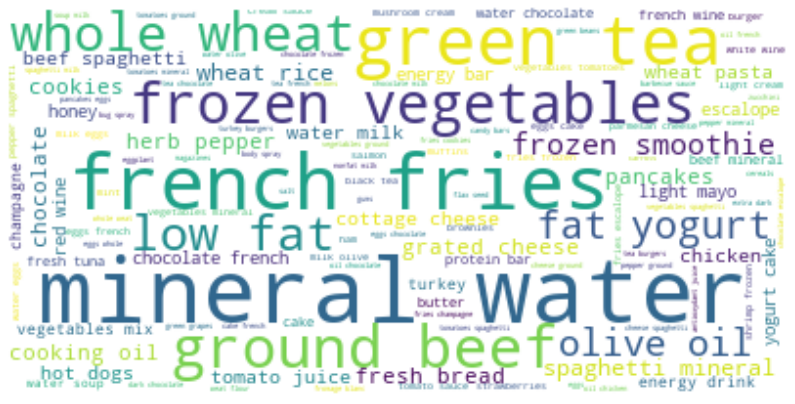

In [118]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18)
# display the word cloud
plt.imshow(freq_wd, interpolation='bilinear')
plt.axis('off')
plt.show()

## The first 2000 words in the Dataset, the most common words are Mineral Water, Green Tea, Ground beef, French Fries, and so on

# Thank You